In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [3]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [4]:
l = 1/np.mean(my_data) #expected lambda based on observed data

#we assume lamda = 3 (null hypothesis)
null_l = 3

lamest = [1/np.mean(stats.expon.rvs(scale = 1/null_l, size = 20)) for i in np.arange(10000)]
avg_lamest = np.mean(lamest) #expected lambda based on random samples of size 20

print("estimated lambda is,", avg_lamest)
print("actual lambda given data is,", l)

print(percentile(97.5, lamest))
print(percentile(2.5, lamest))


estimated lambda is, 3.1383183819734337
actual lambda given data is, 5.089058524173028
4.8733127866010575
2.0361600471691648


#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [8]:
n = 20
ts = -2*log((np.mean(my_data)**n)*(null_l**n)*e**(-null_l*sum(my_data)+n))
print("p-value =", 1-stats.chi2.cdf(ts,1))

#actual cv
critical_val=stats.chi2.ppf(0.95,1)
critical_val

p-value = 0.029827229194775096


3.841458820694124

##### Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [9]:
ts

4.719222360188462

In [51]:
n = 20
lam0 = 3
ts=[]
for _ in np.arange(10000):
    sim_data = stats.expon.rvs(scale = 1/5, size = n)
    test_stat = -2*log((np.mean(sim_data)**n)*(lam0**n)*e**(-lam0*sum(sim_data)+n))
    ts = np.append(ts, test_stat)
    
np.mean(ts>=crit)

0.6009

Repeat for a sample size of 50. What do you expect to happen to power? 

In [54]:
n = 50
lam0 = 3
ts=[]
for _ in np.arange(10000):
    sim_data = stats.expon.rvs(scale = 1/5, size = n)
    test_stat = -2*log((np.mean(sim_data)**n)*(lam0**n)*e**(-lam0*sum(sim_data)+n))
    ts = np.append(ts, test_stat)
    
np.mean(ts>=crit)

0.9532

As sample size increases, power should increase as well.

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

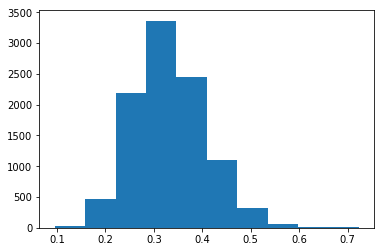

0.0356

In [10]:
n = 20
other_ts = [np.mean(stats.expon.rvs(scale=1/null_l,size=n)) for i in np.arange(10000)]
np.mean(my_data)
plt.hist(other_ts)
plt.show()
2*np.mean(other_ts<=np.mean(my_data))

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [12]:
lowercv,uppercv=percentile([2.5,97.5],other_ts)

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [13]:
another_ts = [np.mean(stats.expon.rvs(scale=1/5,size=n))for i in np.arange(10000)]
np.mean(another_ts>=uppercv)+np.mean(another_ts<=lowercv)

0.5724

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

In [15]:
n = 50
other_ts = [np.mean(stats.expon.rvs(scale=1/null_l,size=n)) for i in np.arange(10000)]
lowercv,uppercv=percentile([2.5,97.5],other_ts)
another_ts = [np.mean(stats.expon.rvs(scale=1/5,size=n))for i in np.arange(10000)]
np.mean(another_ts>=uppercv)+np.mean(another_ts<=lowercv)

0.9404